

# 🎓 Algoritmo REINFORCE

## 🔍 Introducción

El algoritmo **REINFORCE** fue propuesto por **Ronald J. Williams en 1992**, en su artículo "*Simple statistical gradient-following algorithms for connectionist reinforcement learning*".  
Este algoritmo introdujo una forma de **optimizar políticas parametrizadas** directamente mediante el **gradiente de la recompensa esperada**.

REINFORCE es un método de **aprendizaje por refuerzo basado en políticas**. En lugar de aprender valores Q, aprende una política directamente utilizando **gradiente de políticas**.

- Es un algoritmo de **optimización estocástica**
- Usa episodios completos para actualizar la política (sin bootstrapping).
- Utiliza la **regla del gradiente de política** para maximizar la recompensa total esperada.

---
## 📂 Problema

Como vimos en Q-learning, este es un método base para optimizar problemas genéricos (simples) de aprendizaje por refuerzo (RL), pero existen muchos problemas en entornos estocásticos, como la incapacidad de manejar espacios continuos, exploración empírica codiciosa, entre otros.

Para superar estas limitaciones, se han introducido distribuciones estocásticas en algoritmos recientes.

Como viste en el ejercicio anterior, la próxima acción se elige de manera determinista basándose en una tabla-Q o función-Q. Es decir, la política es **determinista**.
Por el contrario, en este ejemplo, la próxima acción se seleccionará basándose en un espacio **estocástico** (es decir, no determinista).

Por ejemplo, podrás usar distribuciones categóricas para espacios de acción discretos, distribuciones Gaussianas para espacios de acción tipo ```Box``` (es decir, continuos) y distribuciones Beta para espacios de acción acotados tipo ```Box```.

Al introducir espacios estocásticos, ya no es necesario aplicar exploraciones empíricas codiciosas.

---

## 📂 Clasificación dentro de RL
* Tipo: Basado en políticas
* Naturaleza: On-policy
* Optimización: Gradiente de políticas
* Tipo de aprendizaje: libre de modelo
* Estimación: Monte Carlo

---

## ⚙️ Características principales

- Aprende una política estocástica $\pi_\theta(a|s)$
- Basado en la maximización de la recompensa esperada $G_t$
- No necesita una función de valor explícita (Ej. $Q$)
- Puede funcionar en espacios de acción continuos
- Alta varianza en las actualizaciones del gradiente
- Mejora con técnicas como **baseline** o **normalización de ventajas**

---

## 📐 Ecuaciones principales

### 🎯 Objetivo:
Maximizar la recompensa total esperada:

$J(\theta) = \mathbb{E}_{\pi_\theta} \left[ \sum_{t=0}^{T} R_t \right]$

### 🔁 Gradiente de política:

$\nabla_\theta J(\theta) = \mathbb{E}_{\pi_\theta} \left[ \sum_{t=0}^{T} \nabla_\theta \log \pi_\theta(a_t | s_t) \cdot G_t \right]$

Donde:
- $\pi_\theta$: política parametrizada por $\theta$
- $G_t$: retorno total acumulado desde el paso $t$

---

## 🧪 Requisitos de los entornos

Los entornos adecuados para REINFORCE deben:

- Permitir generar episodios completos (tipo Monte Carlo)
- Tener una señal de recompensa densa o interpretable
- Preferiblemente tener un espacio de acción **discreto o continuo limitado**
- Ser compatibles con políticas estocásticas

---

## 📋 Pseudocódigo (REINFORCE)

### 📥 Entrada:
**Información del algoritmo**
- $\alpha$ : tasa de aprendizaje (learning rate)  
- $\gamma$: factor de descuento (discount factor)  
- $Episodes$: número total de episodios  
- $Max\_steps$: número máximo de pasos por episodio  
- $\theta$: Los parámetros de la política $\theta$ (red neuronal u otra función)

**Información del entorno**
- $A$: conjunto de acciones posibles  
- $S$: conjunto de estados posibles  

### 📤 Salida:
- $\pi_\theta$: probabilidades de acción (para acciones discretas) o media/desviación (si es continua)

### 📤 Configuración:
  1. Inicializar los parámetros de la política $ \theta$

### 📤 Ejecución:
1. Inicializar los parámetros $\theta$ de la política $\pi_\theta(a|s)$
  2. Para cada episodio:
    3. Generar un episodio completo usando $\pi(a|s,\theta)$: $s_0, a_0, r_1, s_1, a_1, ..., s_T$
    4. Para cada paso $t$ del episodio:
      5. Calcular el retorno acumulado $G_t=\sum_{k=t}^{T} \gamma^{k-t} r_k$
      7. Calcular el gradiente: $\nabla_\theta = log \pi_\theta(a_t|s_t)G_t$
      8. Actualizar los parámetros: $\theta \leftarrow \theta + \alpha \nabla_\theta log \pi_\theta(a_t|s_t)G_t$




## Librerias

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    COLAB = True
    print("Nota: Usando Google CoLab")
except:
    print("Nota: Usando JupyterNotebook")
    COLAB = False

from IPython.display import Image, display
# Si estas en colab ejecutar. Para Jupyter realizar en consola
if COLAB:
  !pip install gymnasium
  !pip install numpy matplotlib
  !pip install renderlab
  !apt update && apt install xvfb
  !pip install gym-notebook-wrapper
  !pip install torch
else:
  %pip install gym-notebook-wrapper
  %pip install numpy matplotlib
  %pip install gymnasium
  %pip install renderlab
  %pip install torch

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
clear_output()

# En el gradiente de política, la acción $a$ se elige según la distribución $P$, que depende de la política $\pi$.<br>
Para explicarlo más claramente, la distribución de la acción está representada por $ P(a | \pi_\theta (s)) $, donde $ \pi_\theta (s) $ es la política y $\theta$ son los parámetros para esta política. Cuando se da el estado actual $s$, la distribución de la acción $a$ (por ejemplo, en distribución categórica, distribución Gaussiana, etc.) se determina por esta política $\pi$.

En este ejemplo de CartPole, asumimos que $P(\cdot)$ es una distribución categórica (porque el espacio de acciones es discreto) y $\pi_\theta (s)$ es una red completamente conectada (fcnet) que tiene 2 salidas.<br>
En este caso, las salidas de esta política $\pi_\theta (s)$ son valores de logits, que determinan la distribución categórica $P(\cdot)$.

> Nota: Cuando se dan los logits $l_0, l_1$, las probabilidades son $\frac{e^{l_0}}{e^{l_0}+e^{l_1}}, \frac{e^{l_1}}{e^{l_0}+e^{l_1}}$, respectivamente, en la distribución categórica.

Ahora implementamos $\pi_\theta (s)$ (red completamente conectada) usando PyTorch de la siguiente manera.

In [2]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F

In [3]:
# Revisa si hay alguna GPU NVIDIA disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class PolicyPi(nn.Module):
    def __init__(self, hidden_dim=64):
        super().__init__()

        self.hidden = nn.Linear(4, hidden_dim)
        self.classify = nn.Linear(hidden_dim, 2)

    def forward(self, s):
        outs = self.hidden(s)
        outs = F.relu(outs)
        logits = self.classify(outs)
        return logits

policy_pi = PolicyPi().to(device)

In [4]:
gamma = 0.99

# Seleccionar acción con la política de distribución policy_pi
def pick_sample(s):
    with torch.no_grad():
        #   --> tamaño : (1, 4)
        s_batch = np.expand_dims(s, axis=0)
        s_batch = torch.tensor(s_batch, dtype=torch.float).to(device)
        # Obtener logits a partir del estado
        #   --> tamaño : (1, 2)
        logits = policy_pi(s_batch)
        #   --> tamaño : (2)
        logits = logits.squeeze(dim=0)
        # De logits a probabilidades
        probs = F.softmax(logits, dim=-1)
        # Seleccionar muestra de la acción
        a = torch.multinomial(probs, num_samples=1)
        # Devolver acción seleccionada
        return a.tolist()[0]

def train(env):
    reward_records = []
    opt = torch.optim.AdamW(policy_pi.parameters(), lr=0.001)
    for i in range(1000):
        #
        # Ejecutar episodio hasta completarlo
        #
        done = False
        states = []
        actions = []
        rewards = []
        s, _ = env.reset()
        while not done:
            states.append(s.tolist())
            a = pick_sample(s)
            s, r, term, trunc, _ = env.step(a)
            done = term or trunc
            actions.append(a)
            rewards.append(r)

        #
        # Obtener recompensas acumuladas
        #
        cum_rewards = np.zeros_like(rewards)
        reward_len = len(rewards)
        for j in reversed(range(reward_len)):
            cum_rewards[j] = rewards[j] + (cum_rewards[j+1]*gamma if j+1 < reward_len else 0)

        #
        # Entrenar (optimizar parámetros)
        #
        states = torch.tensor(states, dtype=torch.float).to(device)
        actions = torch.tensor(actions, dtype=torch.int64).to(device)
        cum_rewards = torch.tensor(cum_rewards, dtype=torch.float).to(device)
        opt.zero_grad()
        logits = policy_pi(states)
        # Calcular el logaritmo negativo de la probabilidad (-log P) como pérdida.
        # La pérdida de entropía cruzada equivale a -log P en distribución categórica. (ver más arriba)
        log_probs = -F.cross_entropy(logits, actions, reduction="none")
        loss = -log_probs * cum_rewards
        loss.sum().backward()
        opt.step()

        # Registrar recompensas totales del episodio (máximo 500)
        print(f'Episodio: {i}, recompensas {sum(rewards)}')
        reward_records.append(sum(rewards))

    print("\nFinalizado")
    env.close()
    return reward_records

Episodio: 0, recompensas 14.0
Episodio: 1, recompensas 13.0
Episodio: 2, recompensas 18.0
Episodio: 3, recompensas 10.0
Episodio: 4, recompensas 15.0
Episodio: 5, recompensas 40.0
Episodio: 6, recompensas 24.0
Episodio: 7, recompensas 23.0
Episodio: 8, recompensas 25.0
Episodio: 9, recompensas 14.0
Episodio: 10, recompensas 46.0
Episodio: 11, recompensas 26.0
Episodio: 12, recompensas 30.0
Episodio: 13, recompensas 23.0
Episodio: 14, recompensas 34.0
Episodio: 15, recompensas 37.0
Episodio: 16, recompensas 21.0
Episodio: 17, recompensas 13.0
Episodio: 18, recompensas 33.0
Episodio: 19, recompensas 47.0
Episodio: 20, recompensas 33.0
Episodio: 21, recompensas 13.0
Episodio: 22, recompensas 24.0
Episodio: 23, recompensas 16.0
Episodio: 24, recompensas 14.0
Episodio: 25, recompensas 44.0
Episodio: 26, recompensas 19.0
Episodio: 27, recompensas 16.0
Episodio: 28, recompensas 31.0
Episodio: 29, recompensas 36.0
Episodio: 30, recompensas 35.0
Episodio: 31, recompensas 22.0
Episodio: 32, reco

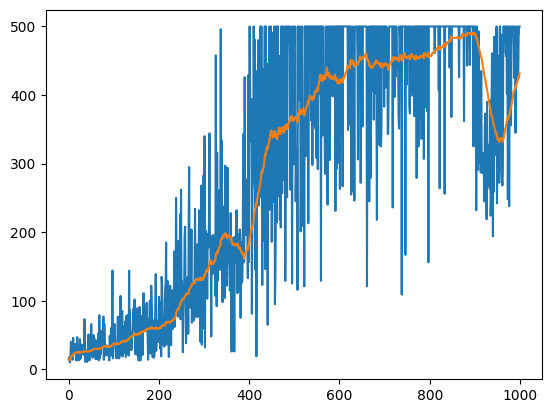

In [5]:
env = gym.make("CartPole-v1")
# policy_pi = PolicyPi().to(device) ## Descomentar si requires reiniciar la red neuronal
reward_records = train(env)

# Guardar el archivo con pickle
torch.save(policy_pi.state_dict(), "/content/drive/MyDrive/Colab Notebooks/policy_pi.pth")

import matplotlib.pyplot as plt
# Generate recent 50 interval average
average_reward = []
for idx in range(len(reward_records)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 50:
        avg_list = reward_records[:idx+1]
    else:
        avg_list = reward_records[idx-49:idx+1]
    average_reward.append(np.average(avg_list))
# Plot
plt.plot(reward_records)
plt.plot(average_reward)

In [6]:
# Evaluación
import renderlab as rl

env = gym.make('CartPole-v1', render_mode='rgb_array')
env = rl.RenderFrame(env, "./output")

rewards = []
states = []

obs, _ = env.reset()
print(obs)
done = False
while not done:
    states.append(obs.tolist())
    a = pick_sample(obs)
    obs, r, term, trunc, _ = env.step(a)
    done = term or trunc
    rewards.append(r)
env.play()
env.close()
# Recompensa (max 500)
print("Recompensa {}".format(sum(rewards)))


[-0.02629948 -0.04935355 -0.00342098  0.01584603]
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Recompensa 460.0
